In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# fetch_mldata downloads data in the file structure scikit_learn_data/mldata/mnist-original.mat
# in your home directory.
# you can also copy from our dataset using rsync -avz /cxldata/scikit_learn_data .
# mnist = fetch_mldata("MNIST original")
mnist = fetch_openml('mnist_784', version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

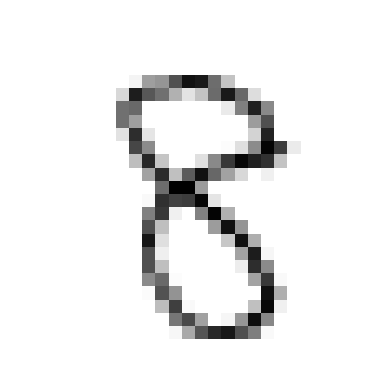

In [ ]:
some_digit = X[3600]   # Selecting the 3600th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
some_digit_image.shape

(28, 28)

In [ ]:
X[3600].shape

(784,)

In [ ]:
y[3600]

'8'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# Multiclass Classification

**# SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.
sgd_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10, random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))
y_pred=sgd_clf.predict(X_test)

['8']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
# Calculate accuracy
accuracy=cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(accuracy)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.8546 0.836  0.8717]
Precision: 0.87
Recall: 0.84
F1 score: 0.84


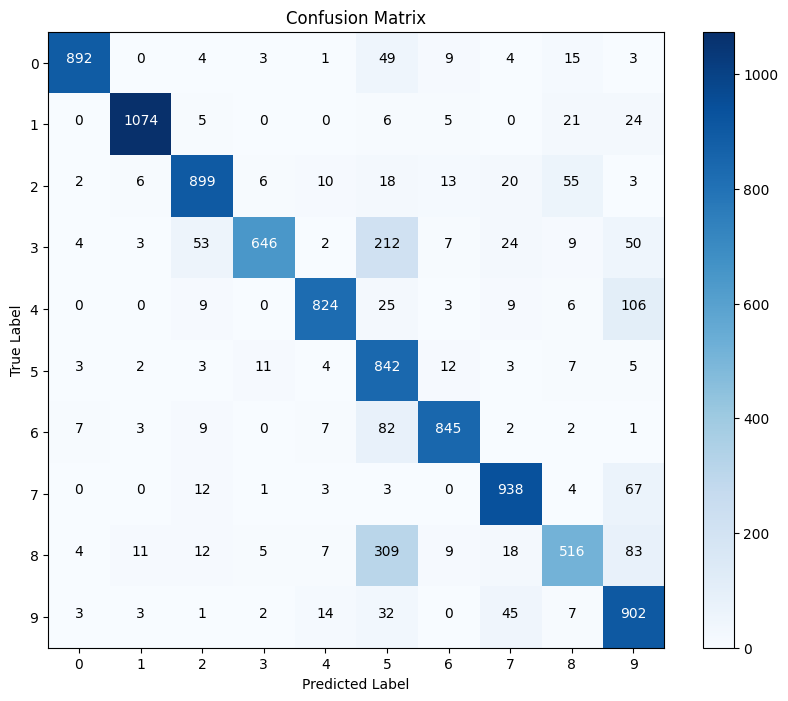

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 score: 0.98


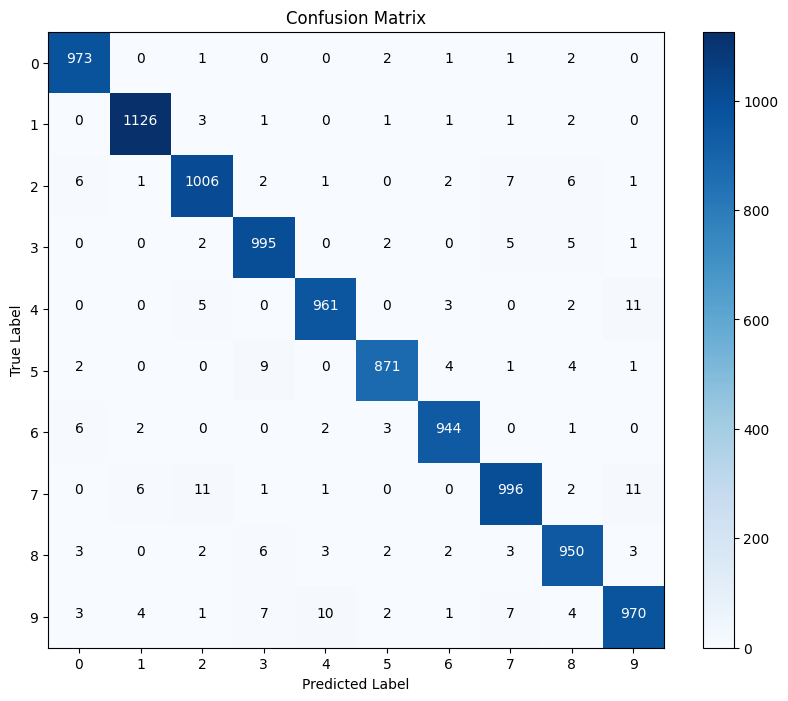

In [ ]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

#Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
per_clf=Perceptron()
per_clf.fit(X_train,y_train)
y_pred=per_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 score: 0.89


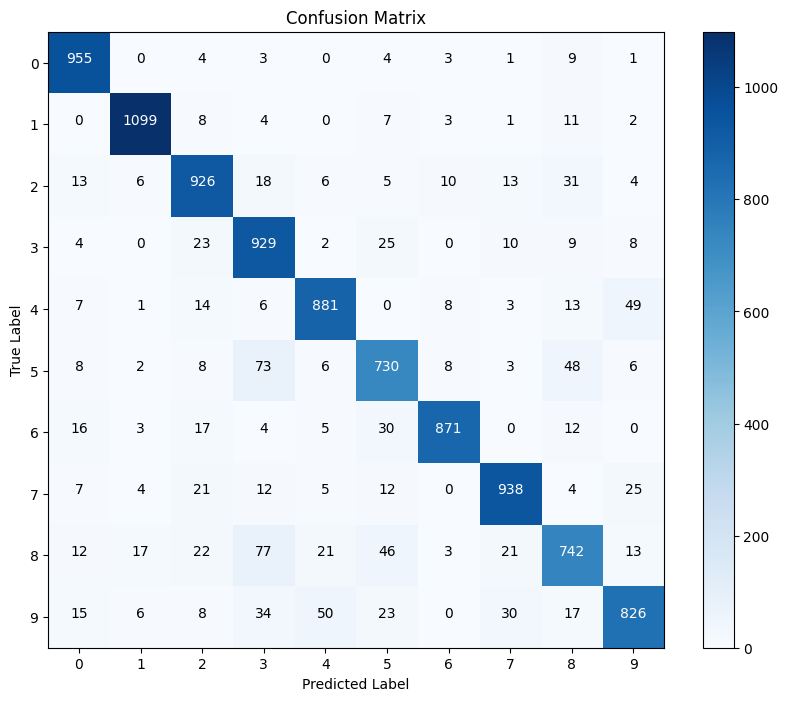

In [ ]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,y_train)
y_pred=LR_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 score: 0.93


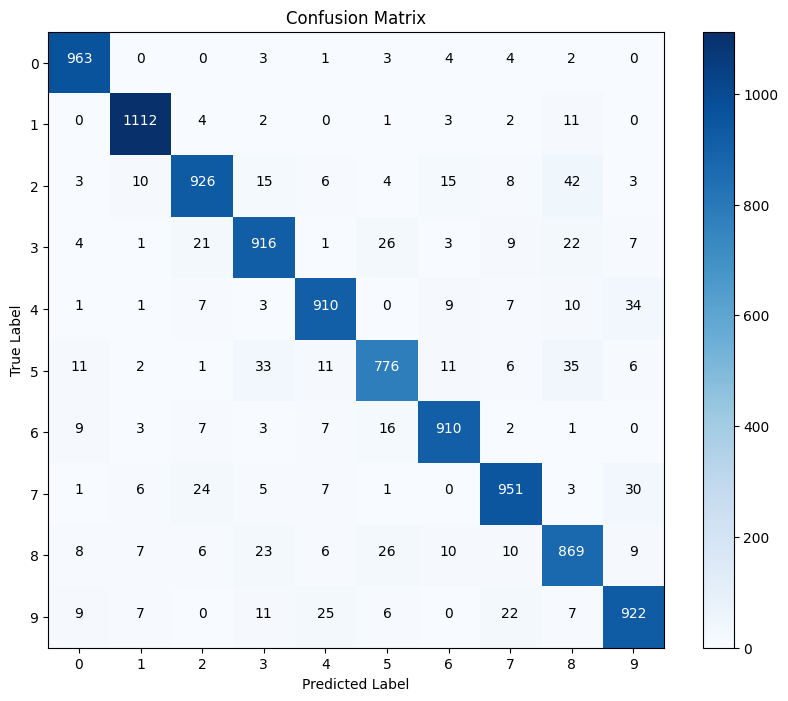

In [ ]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

#K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 score: 0.97


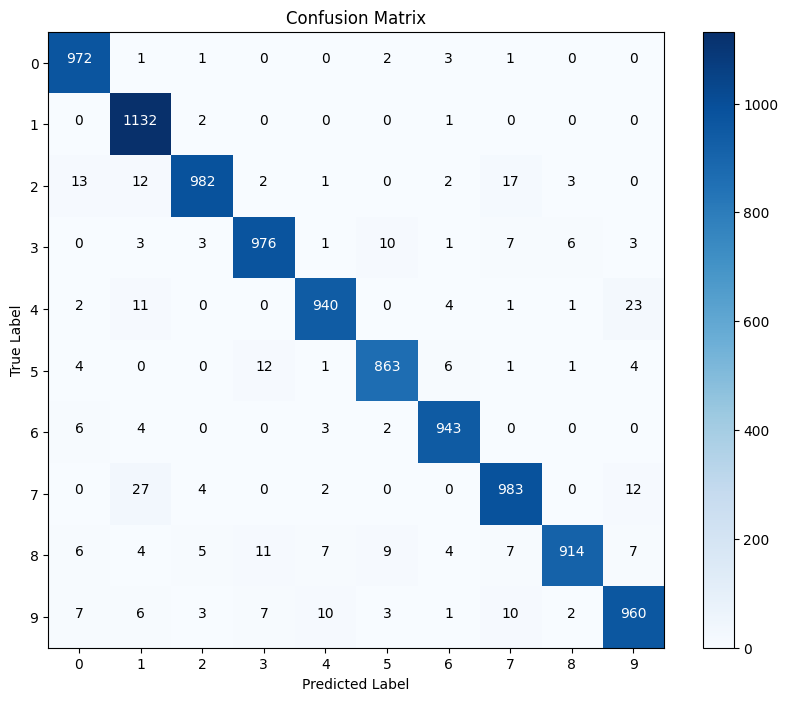

In [ ]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

# Decision Trees

In [ ]:
from sklearn import tree
DT_clf=tree.DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
y_pred=DT_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 score: 0.88


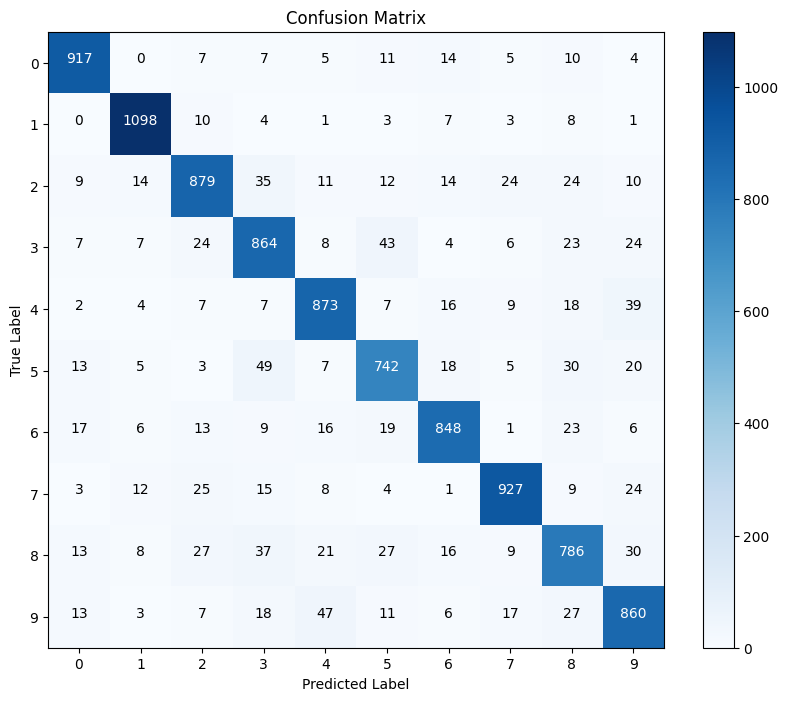

In [ ]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
y_pred=forest_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 score: 0.97


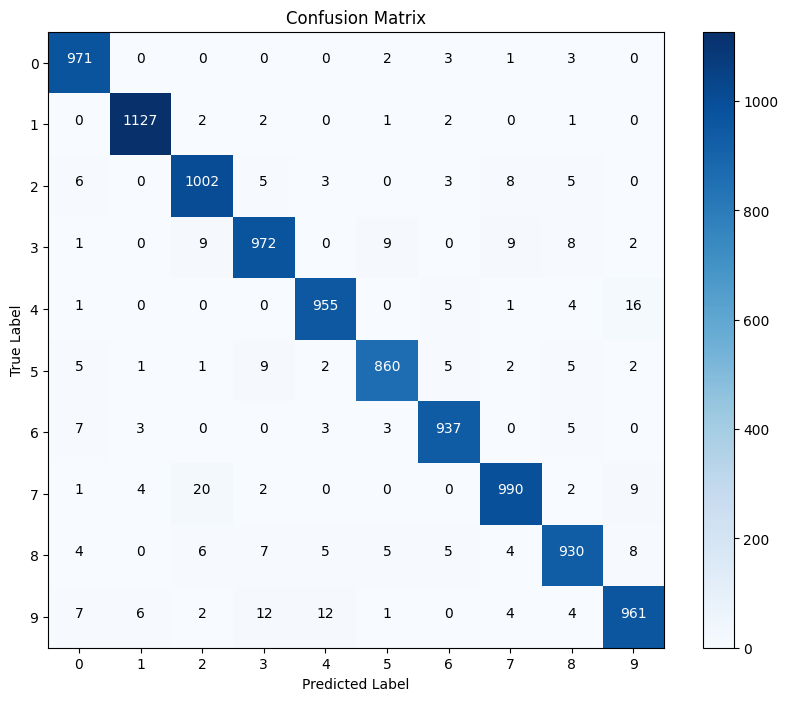

In [ ]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values to the cells
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

#Parameter tuning

In [ ]:
parameter_space = {
    'alpha': [0.01,0.001,0.0001],
    'penalty': ['l1','l2']
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(sgd_clf, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
print("Best parameters:",clf.best_params_)
y_pred=clf.predict(X_test)

Best parameters: {'alpha': 0.0001, 'penalty': 'l1'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 score: 0.90


#Multilabel Classification

In [ ]:
# Convert the elements of the string array to integers
y_train= [int(x) for x in y_train]
type(y_train[0])

int

In [ ]:
y_train_large = [y >= 7 for y in y_train]
y_train_odd = [y % 2 == 1 for y in y_train]
y_multilabel = np.c_[y_train_large, y_train_odd]  # np.c_ is used to concatenate the two arrays element wise


In [ ]:
y_test= [int(x) for x in y_test]
y_test_large = [y >= 7 for y in y_test]
y_test_odd = [y % 2 == 1 for y in y_test]
y_test_multilabel = np.c_[y_test_large, y_test_odd]  # np.c_ is used to concatenate the two arrays element wise

In [ ]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [ ]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=knn_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy=accuracy_score(y_test_multilabel,y_pred)

# Calculate precision
precision = precision_score(y_test_multilabel, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test_multilabel, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test_multilabel, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.97
Precision: 0.98
Recall: 0.98
F1 score: 0.98
